In [5]:
import numpy as np
import pylab
import time
from pathlib import Path

from PyBoltzRun import *

In [6]:
# Setup gases database                                                                                                                       
exec(Path("../Cython/Setup_npy.py").read_text())

In [7]:
# Set up helper object
PBRun=PyBoltzRun()

In [8]:
# Show list of available gases
PBRun.ListGases()

CF4 1
ARGON 2
HELIUM4 3
HELIUM3 4
NEON 5
KRYPTON 6
XENON 7
CH4 8
ETHANE 9
PROPANE 10
ISOBUTANE 11
CO2 12
H2O 14
OXYGEN 15
NITROGEN 16
HYDROGEN 21
DEUTERIUM 22
DME 25


In [9]:
# Configure settings for our simulation
MySettings   ={'Gases'                 :['NEON','CO2'],
               'Fractions'             :[99,1],
               'Max_collisions'        :1,
               'EField_Vcm'            :100,
               'Max_electron_energy'   :0,
               'Temperature_C'         :23,
               'Pressure_Torr'         :7500.062,
               'BField_Tesla'          :0,
               'BField_angle'          :0,
               'Angular_dist_model'    :1,
               'Enable_penning'        :0,
               'Enable_thermal_motion' :1,
               'OF'                    :0}

In [10]:
# Create empty lists to store outputs
DriftVels=[]
DriftVels_err=[]
DTs=[]
DLs=[]
DT1s=[]
DL1s=[]
DTs_err=[]
DLs_err=[]
DT1s_err=[]
DL1s_err=[]

In [11]:

# Run for each E field

EFields=np.arange(100,1000,100)
t1=time.time()
for E in EFields:
    print("Running with E Field " +str(E))

    MySettings['EField_Vcm']=E
    
    Output=PBRun.Run(MySettings)

    DriftVels.append(Output['Drift_vel'].val[2])
    DriftVels_err.append(Output['Drift_vel'].err[2])

    DTs.append(Output['DT'].val)
    DTs_err.append(Output['DT'].err)
    
    DLs.append(Output['DL'].val)
    DLs_err.append(Output['DL'].err)
    
    DT1s.append(Output['DT'].val)
    DT1s_err.append(Output['DT'].err)

    DL1s.append(Output['DL'].val)
    DL1s_err.append(Output['DL'].err)
t2=time.time()

print("Time elapsed:" +str(t2-t1))

Running with E Field 100
Running with E Field 200
Running with E Field 300
Running with E Field 400
Running with E Field 500
Running with E Field 600
Running with E Field 700
Running with E Field 800
Running with E Field 900
423.76263403892517


Text(0, 0.5, 'Drift Velocity (mm/$\\mu$ s)')

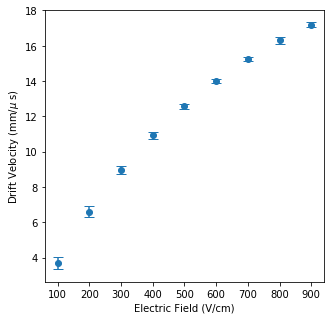

In [12]:
pylab.figure(figsize=(5,5))
pylab.errorbar(EFields,DriftVels,DriftVels_err,capsize=5,fmt='o')
pylab.xlabel("Electric Field (V/cm)")
pylab.ylabel(r"Drift Velocity (mm/$\mu$ s)")

In [20]:
#pylab.figure(figsize=(5,5))
#pylab.errorbar(EFields,DTs,DTs_err,capsize=5,fmt='o',label="Transverse")
#pylab.errorbar(EFields,DLs,DLs_err,capsize=5,fmt='o',label="Longitudinal")
#pylab.xlabel("Electric Field (V/cm)")
#pylab.ylabel(r"Diffusion (cm$^2$ s$^{-1}$)")

In [21]:
#pylab.figure(figsize=(5,5))
#pylab.errorbar(EFields,DT1s,DT1s_err,capsize=5,fmt='o',label="Transverse")
#pylab.errorbar(EFields,DL1s,DL1s_err,capsize=5,fmt='o',label="Longitudinal")
#pylab.xlabel("Electric Field (V/cm)")
#pylab.ylabel(r"Diffusion ($\mu$m cm$^{-\frac{1}{2}}$)")